## AdaBoost From Scratch 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("---Authored By Antarikshya Mitra---")

---Authored By Antarikshya Mitra---


In [5]:
df = pd.DataFrame()

In [6]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [7]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

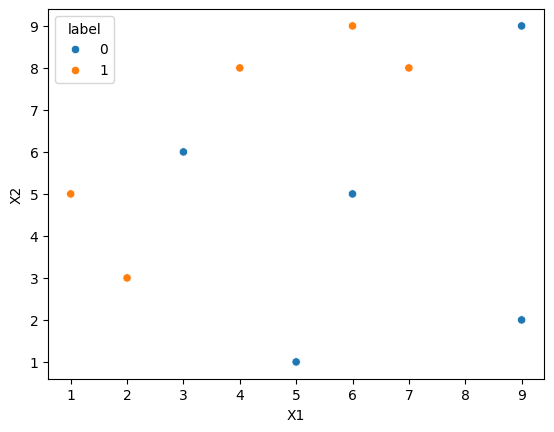

In [8]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [9]:
df["weights"] = 1 / df.shape[0]

In [10]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [11]:
from sklearn.tree import DecisionTreeClassifier
     

dt1 = DecisionTreeClassifier(max_depth=1)
     

X = df.iloc[:,0:2].values
y = df.iloc[:,2].values
     

# Step 2 - Train 1st model
dt1.fit(X,y)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",1
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

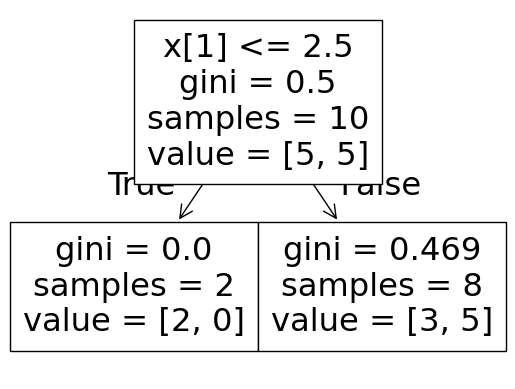

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1)

In [13]:
df['y_pred'] = dt1.predict(X)
     

df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [14]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))
     

# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1
     

np.float64(0.42364893019360184)

In [15]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)
     

df['updated_weights'] = df.apply(update_row_weights,axis=1)
     

df
     

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [16]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
     

df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [17]:
df['nomalized_weights'].sum()
     
1.0

df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])
     

df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']
     

df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [18]:

def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices
     

index_values = create_new_dataset(df)

index_values
     

[2, 0, 6, 1, 2, 0, 8, 8, 7, 0]

In [19]:
second_df = df.iloc[index_values,[0,1,2,3]]
     

second_df

,X1,X2,label,weights
2,3,6,0,0.1
0,1,5,1,0.1
6,6,5,0,0.1
1,2,3,1,0.1
2,3,6,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
7,7,8,1,0.1
0,1,5,1,0.1


In [20]:
dt2 = DecisionTreeClassifier(max_depth=1)
     

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
     

dt2.fit(X,y)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",1
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.625, 0.5, '  False')]

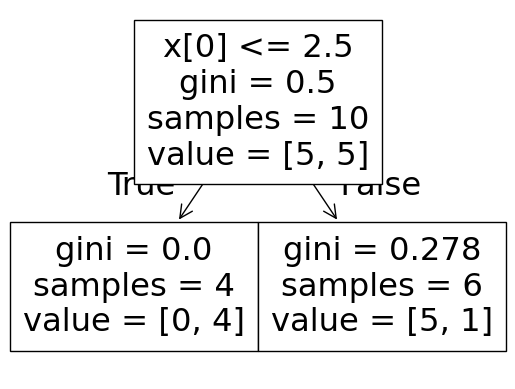

In [21]:
plot_tree(dt2)
     

In [22]:
second_df['y_pred'] = dt2.predict(X)
     

second_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,0
0,1,5,1,0.1,1
6,6,5,0,0.1,0
1,2,3,1,0.1,1
2,3,6,0,0.1,0
0,1,5,1,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,0
7,7,8,1,0.1,0
0,1,5,1,0.1,1


In [23]:
alpha2 = calculate_model_weight(0.1)
     

alpha2
     

np.float64(1.0986122886681098)

In [24]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)
     

second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
     

second_df

,X1,X2,label,weights,y_pred,updated_weights
2,3,6,0,0.1,0,0.033622
0,1,5,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
1,2,3,1,0.1,1,0.033622
2,3,6,0,0.1,0,0.033622
0,1,5,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
7,7,8,1,0.1,0,0.297427
0,1,5,1,0.1,1,0.033622


In [26]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()


second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
2,3,6,0,0.1,0,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
7,7,8,1,0.1,0,0.297427,0.495694
0,1,5,1,0.1,1,0.033622,0.056034


In [27]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
     

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
     

second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]
     

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
2,3,6,0,0.1,0,0.056034,0.000000,0.056034
0,1,5,1,0.1,1,0.056034,0.056034,0.112068
6,6,5,0,0.1,0,0.056034,0.112068,0.168102
1,2,3,1,0.1,1,0.056034,0.168102,0.224136
2,3,6,0,0.1,0,0.056034,0.224136,0.280170
0,1,5,1,0.1,1,0.056034,0.280170,0.336204
8,9,9,0,0.1,0,0.056034,0.336204,0.392238
8,9,9,0,0.1,0,0.056034,0.392238,0.448272
7,7,8,1,0.1,0,0.495694,0.448272,0.943966
0,1,5,1,0.1,1,0.056034,0.943966,1.000000


In [28]:
index_values = create_new_dataset(second_df)
     

third_df = second_df.iloc[index_values,[0,1,2,3]]
     

third_df

,X1,X2,label,weights
6,6,5,0,0.1
8,9,9,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1


In [29]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",1
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [30]:
third_df['y_pred'] = dt3.predict(X)
     

third_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
8,9,9,0,0.1,1
7,7,8,1,0.1,0
8,9,9,0,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,1
8,9,9,0,0.1,0
2,3,6,0,0.1,0
8,9,9,0,0.1,0
6,6,5,0,0.1,1


In [31]:

alpha3 = calculate_model_weight(0.7)
alpha3
     


np.float64(-0.4236489301936017)

In [32]:
print(alpha1,alpha2,alpha3)
     

0.42364893019360184 1.0986122886681098 -0.4236489301936017


### Prediction

In [33]:

query = np.array([1,5]).reshape(1,2)
dt1.predict(query)
     

array([1])

In [34]:
dt2.predict(query)

array([1])

In [35]:
dt3.predict(query)
     

array([1])

In [36]:
alpha1*1 + alpha2*(1) + alpha3*(1)

np.float64(1.09861228866811)

In [37]:

np.sign(1.09)


np.float64(1.0)

In [38]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [39]:
dt2.predict(query)

array([0])

In [40]:
dt3.predict(query)

array([0])

In [41]:

alpha1*(1) + alpha2*(-1) + alpha3*(-1)

np.float64(-0.2513144282809062)

In [42]:
np.sign(-0.25)

np.float64(-1.0)

# ADABoost Classifier Sklearn Implementation

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [45]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

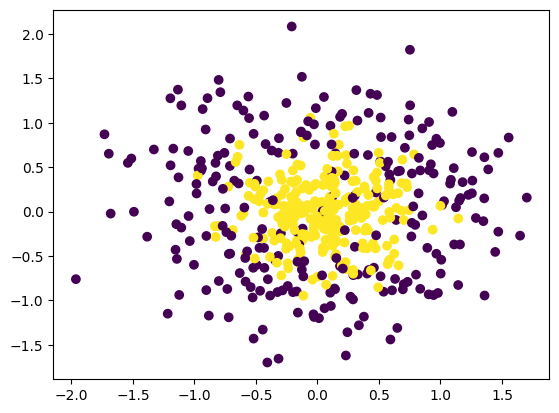

In [46]:

plt.scatter(X[:,0],X[:,1],c=y)

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

np.float64(0.812)

In [48]:
abc.fit(X,y)

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",50
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",1.0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None


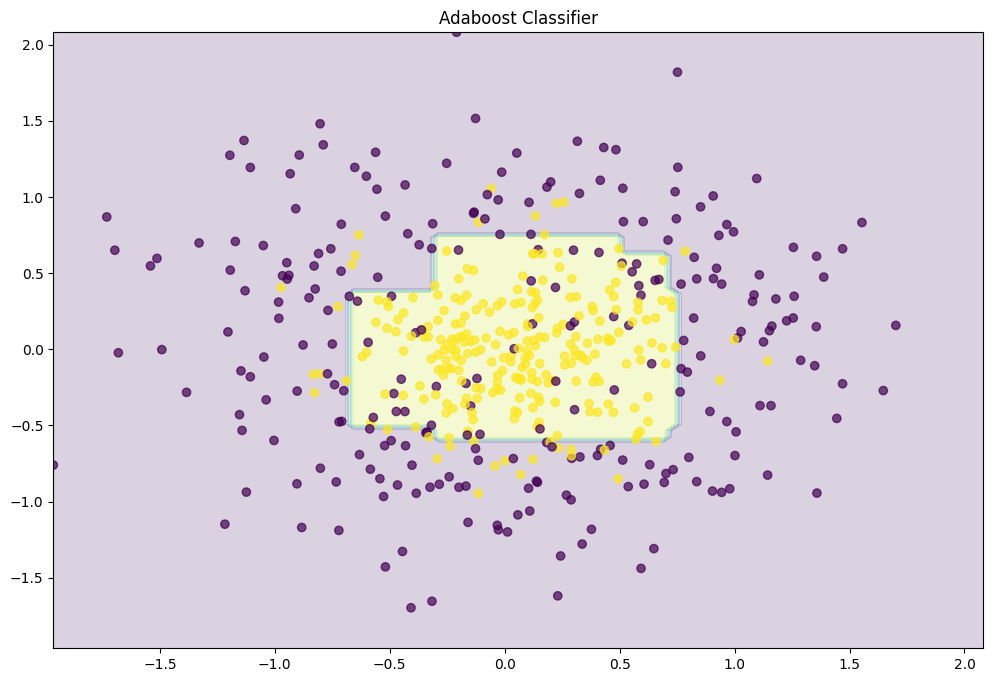

In [49]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(abc)

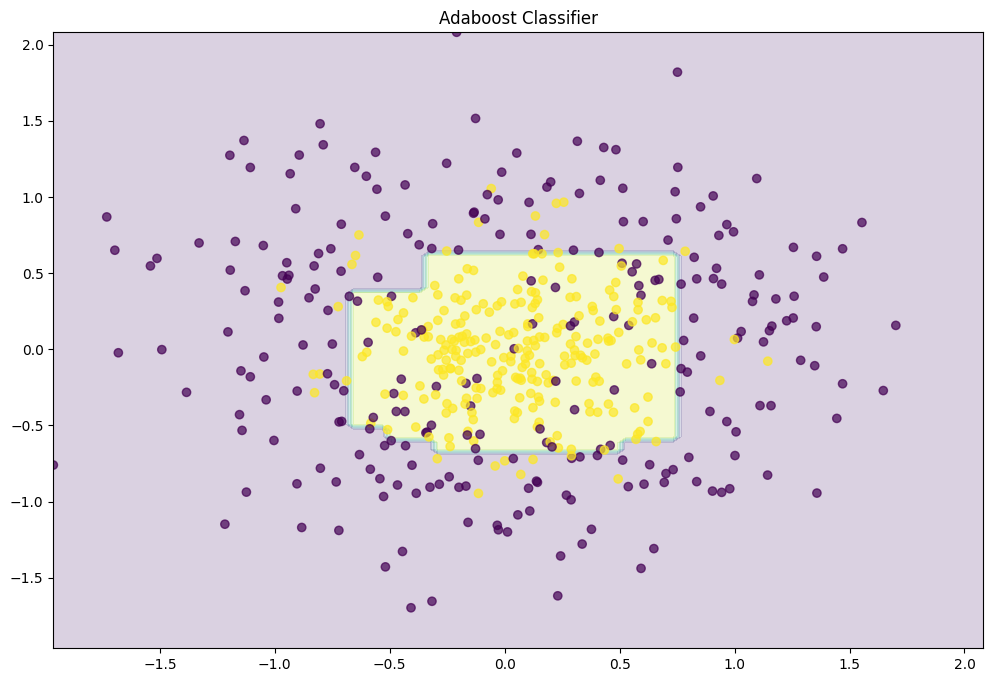

In [58]:
abc = AdaBoostClassifier(n_estimators=1000,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

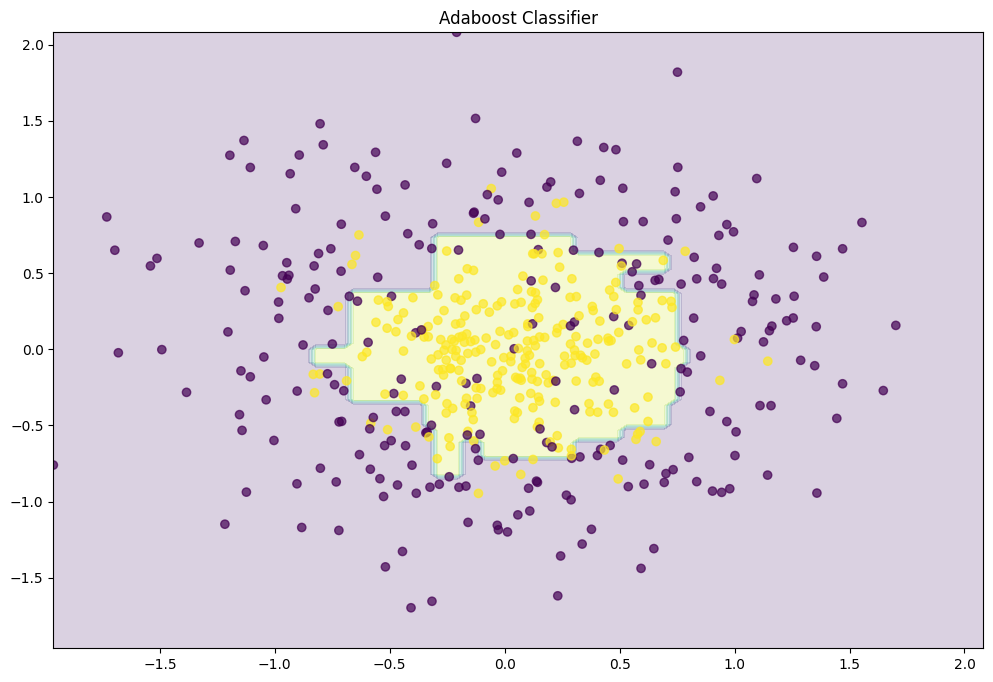

In [56]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=1)
abc.fit(X,y)
plot_decision_boundary(abc)
